# 1D_Kalman_filter
1次元でのKalman filterサンプルです。
# ライブラリのインポート

In [1]:
%matplotlib inline
import numpy as np
import math, random
import matplotlib.pyplot as plt

# ランドマーククラス
下のグラフに表示されている星です。  
ロボットはこの星を目印にして自分の位置を知ります。  
今回は星の位置もロボットが覚えている設定です。  

In [2]:
class Landmark:
    #目印となるランドマークの位置設定
    def __init__(self, pos):
        self.true_lx = pos
    
    #ランドマークの描画
    def draw(self):
        xs = self.true_lx
        ys = 1.0
        plt.scatter(xs,ys,s=300,marker="*",label="landmarks",color="orange")

# ロボットクラス
ロボットは下のグラフの赤い矢印です。  

In [3]:
class Robot:
    def __init__(self, pos, sigma):
        self.true_x = pos     #ロボットの初期位置
        self.bel_x = pos      #推定位置の初期位置
        self.sigma_x = sigma  #初期位置の標準偏差
        
    def move(self, fw):
        sigma_fw = fw * 0.3                      #移動量の30%を標準偏差に設定
        actual_fw = random.gauss(fw, sigma_fw)   #雑音の入った移動量の計算
        self.true_x = self.true_x + actual_fw    #ロボットの移動
        
        self.bm_bel_x = self.bel_x       #移動前の推定位置の保存
        self.bm_sigma_x = self.sigma_x   #移動前の推定位置の標準偏差を保存
        
        self.bel_x = self.bel_x + fw     #推定位置の移動
        self.sigma_x = math.sqrt(self.sigma_x ** 2 + sigma_fw ** 2)    #移動前の標準偏差に移動量の標準偏差を加算
        
        self.am_bel_x = self.bel_x      #移動後の推定位置の保存
        self.am_sigma_x = self.sigma_x  #移動後の標準偏差を保存
        
    def observation(self, landmark):
        distance = math.sqrt((self.true_x - landmark.true_lx) ** 2)        #ランドマークとロボットの距離を計測
        self.sigma_z = distance * 0.1                                      #距離の10%を標準偏差にする
        self.z = landmark.true_lx - random.gauss(distance, self.sigma_z)   #観測結果に雑音を加える
        
    def kalman_filter(self):
        kalman_gain = self.sigma_x ** 2 / (self.sigma_x ** 2 + self.sigma_z ** 2) #カルマンゲインの計算
        
        self.bel_x = self.bel_x + kalman_gain * (self.z - self.bel_x)       #カルマンフィルタによる推定位置の更新
        self.sigma_x = math.sqrt((1 - kalman_gain) * (self.sigma_x ** 2))   #推定位置の標準偏差の更新
        
    def draw(self, sp, i):
        #ロボットの描画
        xs  = self.true_x
        ys  = 0.0
        vxs = 1.0
        vys = 0.0
        plt.quiver(xs,ys,vxs,vys,color="red",label="actual robot pos")
        
        xs  = self.bel_x
        ys = 1.0
        plt.scatter(xs,ys,s=100,marker="^",label="bel_x",color="deepskyblue")

        if i > 0:
            x = np.arange(-0.5, 1.5, 0.0001)
            
            #移動前の推定位置の分布を描画
            bm_bel_x = np.exp(-(self.bm_bel_x - x) ** 2 / (2 * (self.bm_sigma_x ** 2))) / (self.bm_sigma_x * np.sqrt(2 * np.pi))
            #移動後の推定位置の分布を描画
            am_bel_x = np.exp(-(self.am_bel_x - x) ** 2 / (2 * (self.am_sigma_x ** 2))) / (self.am_sigma_x * np.sqrt(2 * np.pi))
            #観測結果の分布を描画
            z        = np.exp(-(self.z - x) ** 2 / (2 * (self.sigma_z ** 2))) / (self.sigma_z * np.sqrt(2 * np.pi))
            #推定位置の分布を描画
            bel_x    = np.exp(-(self.bel_x - x) ** 2 / (2 * (self.sigma_x ** 2))) / (self.sigma_x * np.sqrt(2 * np.pi))

            plt.plot(x, bm_bel_x, color = "red",label="bm_bel_x")
            plt.plot(x, am_bel_x, color = "green",label="am_bel_x")
            plt.plot(x, z       , color = "blue",label="z")
            plt.plot(x, bel_x   , color = "orange",label="bel_x")

        plt.legend()

# 描画関数

In [4]:
def draw(i):
    #グラフの設定
    fig = plt.figure(i, figsize=(14,6))
    sp = fig.add_subplot(111)
    sp.set_xlim(-0.25,1.25)
    sp.set_ylim(-0.2,35)
    
    #ロボット、ランドマークの描画
    robot.draw(sp, i)
    landmark.draw()
        
    plt.legend()

# シミュレーション開始
ロボットが移動、観測、フィルタリングを繰り返します。  

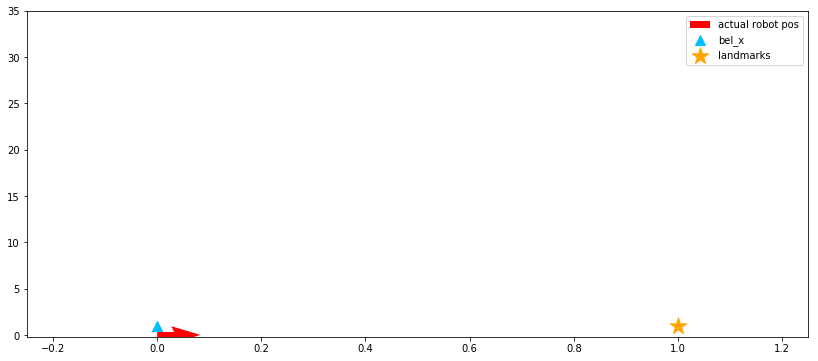

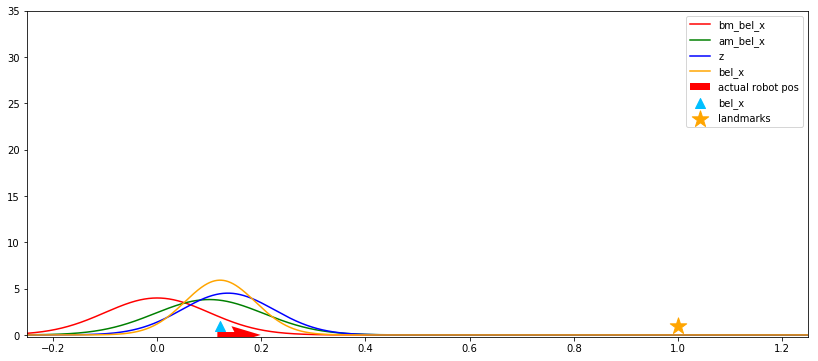

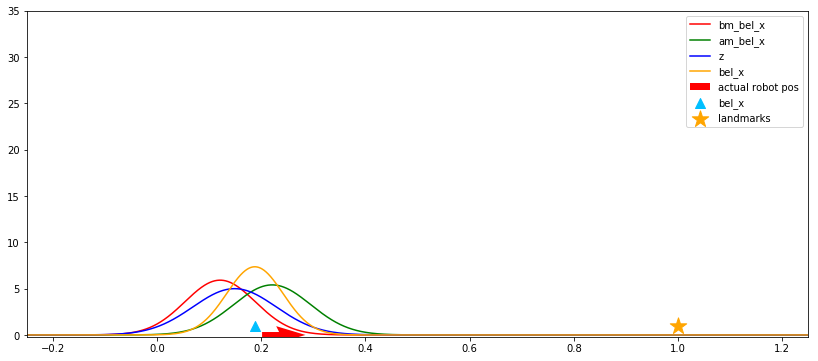

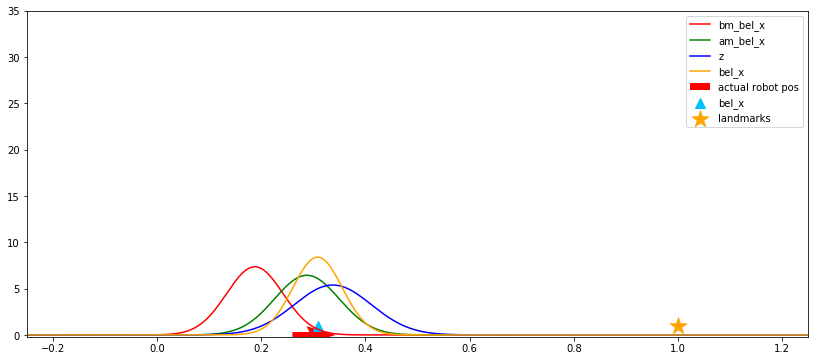

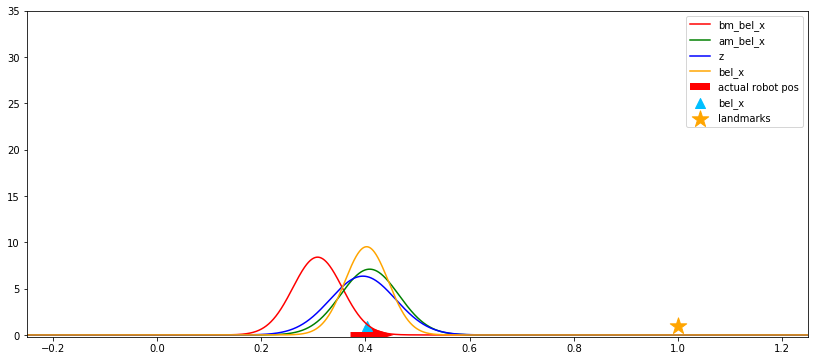

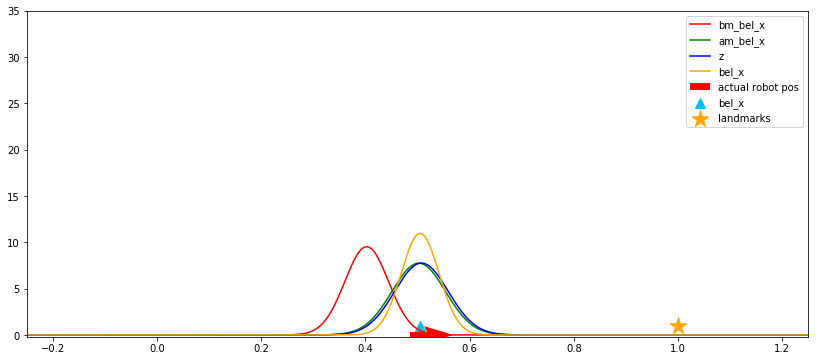

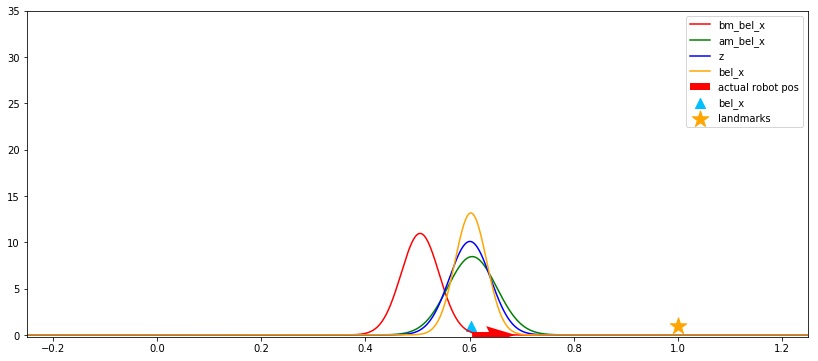

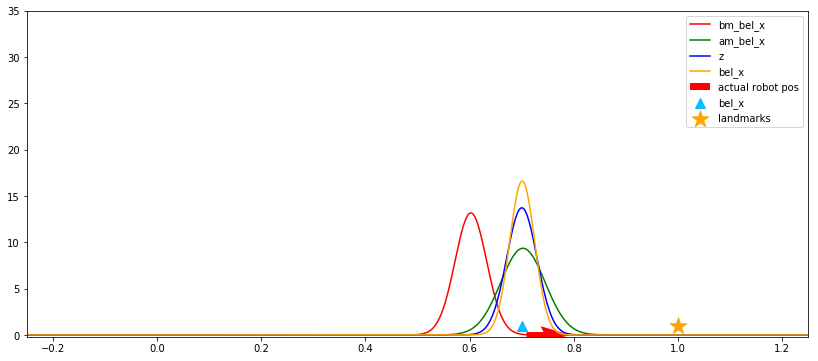

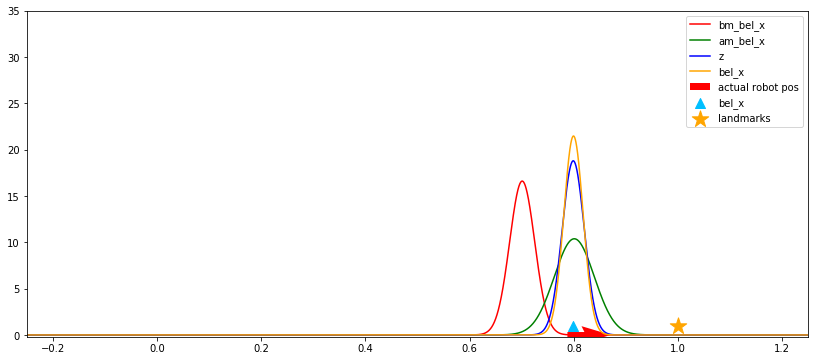

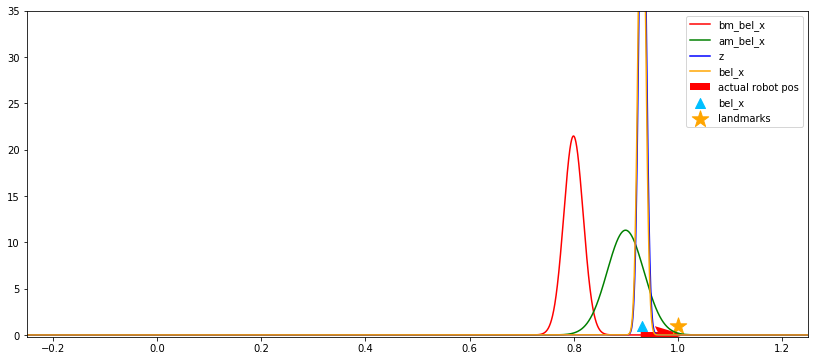

In [5]:
robot = Robot(0.0, 0.1)   #ロボットの設置
landmark = Landmark(1.0)  #ランドマークの設置
draw(0)

for i in range(1, 10):
    robot.move(0.1)               #ロボットの移動
    robot.observation(landmark)   #ロボットの観測
    robot.kalman_filter()         #カルマンフィルタ
    draw(i)                       #描画